# load necessary libraries

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


# load the dataset

In [ ]:
# Define paths
testing_image_2 = '/content/drive/MyDrive/data_stereo/testing/image_2'
testing_image_3 = '/content/drive/MyDrive/data_stereo/testing/image_3'
training_image_2 = '/content/drive/MyDrive/data_stereo/training/image_2'
training_image_3 = '/content/drive/MyDrive/data_stereo/training/image_3'


In [ ]:
# Function to load images from folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images


In [ ]:
# Load testing and training data
testing_images_2 = load_images_from_folder(testing_image_2)
testing_images_3 = load_images_from_folder(testing_image_3)
training_images_2 = load_images_from_folder(training_image_2)
training_images_3 = load_images_from_folder(training_image_3)


In [ ]:
# Data analysis: Check the number of images and their shape
def analyze_data(images, label):
    print(f"Number of images in {label}: {len(images)}")
    if len(images) > 0:
        print(f"Shape of images in {label}: {images[0].shape}")


In [ ]:
# Analyze testing and training datasets
analyze_data(testing_images_2, "Testing Image 2")
analyze_data(testing_images_3, "Testing Image 3")
analyze_data(training_images_2, "Training Image 2")
analyze_data(training_images_3, "Training Image 3")

Number of images in Testing Image 2: 400
Shape of images in Testing Image 2: (375, 1242, 3)
Number of images in Testing Image 3: 400
Shape of images in Testing Image 3: (375, 1242, 3)
Number of images in Training Image 2: 400
Shape of images in Training Image 2: (375, 1242, 3)
Number of images in Training Image 3: 400
Shape of images in Training Image 3: (375, 1242, 3)


In [ ]:
# Data processing: Convert images to grayscale
def convert_to_grayscale(images):
    gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]
    return gray_images


In [ ]:
# Convert to grayscale
testing_gray_2 = convert_to_grayscale(testing_images_2)
testing_gray_3 = convert_to_grayscale(testing_images_3)
training_gray_2 = convert_to_grayscale(training_images_2)
training_gray_3 = convert_to_grayscale(training_images_3)


In [ ]:
# Data visualization: Display a few sample images from each dataset
def display_images(images, title, num_samples=3):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'{title} Image {i+1}')
        plt.axis('off')
    plt.show()


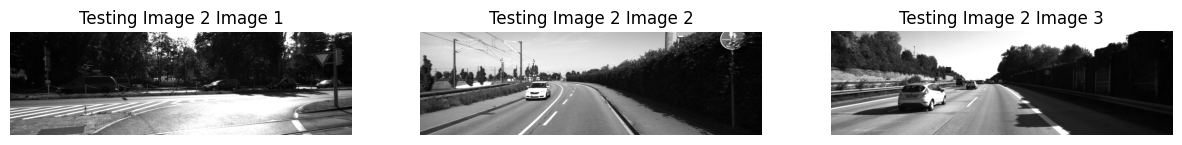

In [ ]:
# Display some images from the testing and training datasets
display_images(testing_gray_2, "Testing Image 2")

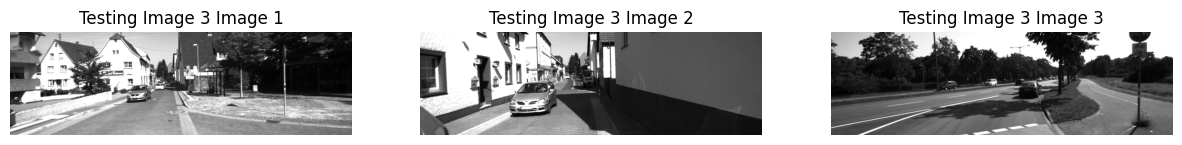

In [ ]:
display_images(testing_gray_3, "Testing Image 3")

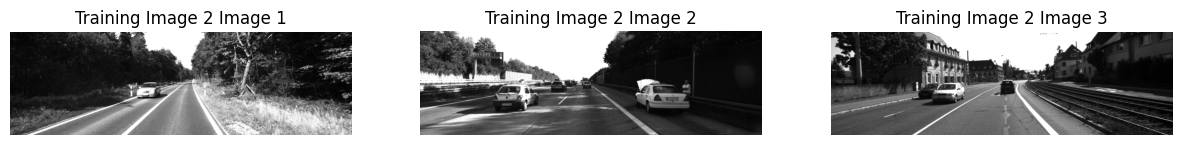

In [ ]:
display_images(training_gray_2, "Training Image 2")

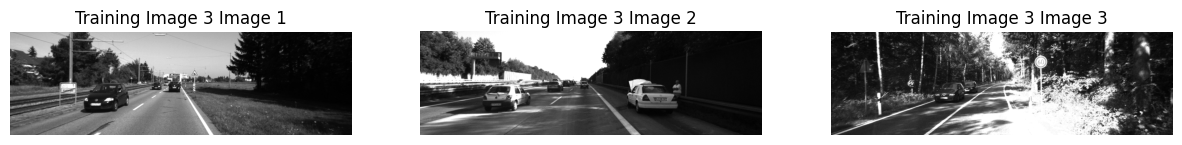

In [ ]:
display_images(training_gray_3, "Training Image 3")

# pre processing the dataset

In [ ]:
# Additional data analysis: Calculate basic statistics
def calculate_statistics(images):
    image_means = [np.mean(img) for img in images]
    image_stds = [np.std(img) for img in images]
    return np.mean(image_means), np.mean(image_stds)


In [ ]:
# Calculate and display statistics
mean_test_2, std_test_2 = calculate_statistics(testing_gray_2)
mean_test_3, std_test_3 = calculate_statistics(testing_gray_3)
mean_train_2, std_train_2 = calculate_statistics(training_gray_2)
mean_train_3, std_train_3 = calculate_statistics(training_gray_3)

print(f"Testing Image 2 - Mean: {mean_test_2}, Std: {std_test_2}")
print(f"Testing Image 3 - Mean: {mean_test_3}, Std: {std_test_3}")
print(f"Training Image 2 - Mean: {mean_train_2}, Std: {std_train_2}")
print(f"Training Image 3 - Mean: {mean_train_3}, Std: {std_train_3}")


Testing Image 2 - Mean: 97.97037619799404, Std: 75.56302326189547
Testing Image 3 - Mean: 98.76463654782557, Std: 75.13444345586164
Training Image 2 - Mean: 99.63793601291944, Std: 76.99488624261019
Training Image 3 - Mean: 100.99617210105016, Std: 76.83239656875946


# Sum of Squared Differences (SSD) & Normalized Cross-Correlation (NCC)

# (RMSE) and (MAE)

In [ ]:
import os
import cv2
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skimage.feature import canny
import matplotlib.pyplot as plt

In [ ]:
# Paths provided for dataset
testing_image_2 = '/content/drive/MyDrive/data_stereo/testing/image_2'
testing_image_3 = '/content/drive/MyDrive/data_stereo/testing/image_3'
training_image_2 = '/content/drive/MyDrive/data_stereo/training/image_2'
training_image_3 = '/content/drive/MyDrive/data_stereo/training/image_3'


In [ ]:
# Helper function for loading images
def load_image(image_path):
    if not os.path.exists(image_path):
        raise ValueError(f"Image not found at {image_path}")
    return cv2.imread(image_path, 0)  # Grayscale image


In [ ]:
# Canny Edge Detection
def apply_canny(image):
    if image is None:
        raise ValueError("Image is None. Please check the file path.")
    edges = canny(image, sigma=1.0)
    return edges

In [ ]:

# SSD (Sum of Squared Differences) based Disparity Calculation
def ssd(left_image, right_image, window_size=9):
    if left_image is None or right_image is None:
        raise ValueError("Image is None. Please check the file path.")

    half_window = window_size // 2
    disparity_map = np.zeros_like(left_image)

    for y in range(half_window, left_image.shape[0] - half_window):
        for x in range(half_window, left_image.shape[1] - half_window):
            best_offset = 0
            min_ssd = float('inf')
            for offset in range(0, 64):
                try:
                    ssd_value = np.sum((left_image[y-half_window:y+half_window+1, x-half_window:x+half_window+1] -
                                        right_image[y-half_window:y+half_window+1, x-half_window-offset:x+half_window+1-offset])**2)
                    if ssd_value < min_ssd:
                        min_ssd = ssd_value
                        best_offset = offset
                except:
                    continue
            disparity_map[y, x] = best_offset
    return disparity_map


In [ ]:
# Disparity Estimation
def disparity_estimation_with_epipolar(left_image, right_image, method='ssd'):
    if left_image is None or right_image is None:
        raise ValueError("One of the input images is None. Please check the file path.")

    if method == 'ssd':
        disparity_map = ssd(left_image, right_image)
    return disparity_map


In [ ]:
# RMSE and MAE calculation
def compute_metrics(disparity_map, ground_truth):
    rmse = np.sqrt(mean_squared_error(ground_truth, disparity_map))
    mae = mean_absolute_error(ground_truth, disparity_map)
    return rmse, mae

In [ ]:
# Visualization function
def visualize_results(left_image, right_image, disparity_map, ground_truth):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    axs[0, 0].imshow(left_image, cmap='gray')
    axs[0, 0].set_title('Left Image')

    axs[0, 1].imshow(right_image, cmap='gray')
    axs[0, 1].set_title('Right Image')

    axs[1, 0].imshow(disparity_map, cmap='jet')
    axs[1, 0].set_title('Estimated Disparity Map')

    axs[1, 1].imshow(ground_truth, cmap='jet')
    axs[1, 1].set_title('Ground Truth Disparity Map')

    plt.show()


SSD - RMSE: 8.959576901290271, MAE: 35.33059366612989


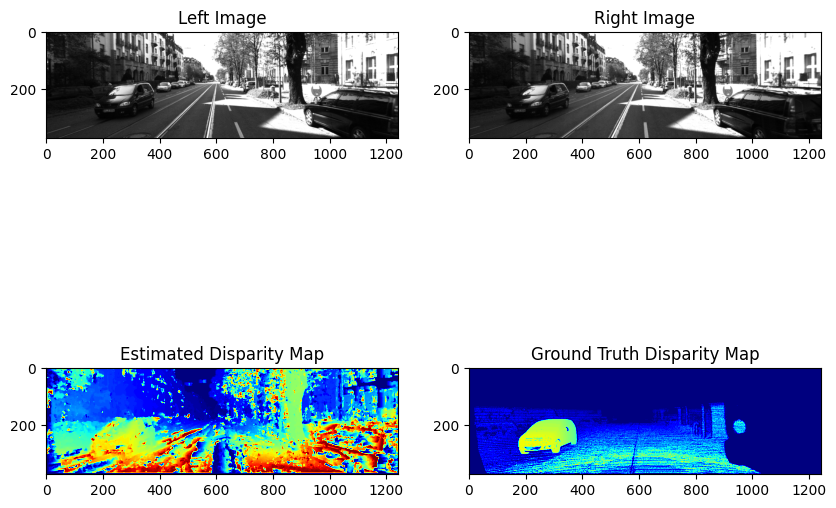

In [ ]:
# Main function
def main():
    # Load images from the dataset
    left_image_path = os.path.join(training_image_2, '000000_10.png')  # Update with the correct image file
    right_image_path = os.path.join(training_image_3, '000000_10.png')  # Update with the correct image file
    ground_truth_path = '/content/drive/MyDrive/data_stereo/training/disp_noc_0/000000_10.png'  # Ground truth disparity image

    left_image = load_image(left_image_path)
    right_image = load_image(right_image_path)
    ground_truth_disparity = load_image(ground_truth_path)

    # Check if images are loaded correctly
    if left_image is None or right_image is None or ground_truth_disparity is None:
        raise ValueError("One or more images could not be loaded. Please check the file paths.")

    # Apply image filtering techniques (e.g., Canny Edge Detection)
    left_edges = apply_canny(left_image)
    right_edges = apply_canny(right_image)

    # Disparity estimation using SSD
    disparity_map_ssd = disparity_estimation_with_epipolar(left_image, right_image, method='ssd')

    # Compute metrics (RMSE and MAE)
    rmse_ssd, mae_ssd = compute_metrics(disparity_map_ssd, ground_truth_disparity)
    print(f"SSD - RMSE: {rmse_ssd}, MAE: {mae_ssd}")

    # Visualize results
    visualize_results(left_image, right_image, disparity_map_ssd, ground_truth_disparity)

if __name__ == "__main__":
    main()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualization function with more stages of processing
def extended_visualize_results(left_image, right_image, left_edges, right_edges, disparity_map, ground_truth):
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))

    # Left Image
    axs[0, 0].imshow(left_image, cmap='gray')
    axs[0, 0].set_title('Left Image')
    axs[0, 0].axis('off')

    # Right Image
    axs[0, 1].imshow(right_image, cmap='gray')
    axs[0, 1].set_title('Right Image')
    axs[0, 1].axis('off')

    # Ground Truth Disparity
    axs[0, 2].imshow(ground_truth, cmap='jet')
    axs[0, 2].set_title('Ground Truth Disparity Map')
    axs[0, 2].axis('off')

    # Left Edges (Canny Edge Detection)
    axs[1, 0].imshow(left_edges, cmap='gray')
    axs[1, 0].set_title('Left Image (Edges - Canny)')
    axs[1, 0].axis('off')

    # Right Edges (Canny Edge Detection)
    axs[1, 1].imshow(right_edges, cmap='gray')
    axs[1, 1].set_title('Right Image (Edges - Canny)')
    axs[1, 1].axis('off')

    # Estimated Disparity Map
    axs[1, 2].imshow(disparity_map, cmap='jet')
    axs[1, 2].set_title('Estimated Disparity Map (SSD)')
    axs[1, 2].axis('off')

    # Difference between Left and Right Images
    diff_img = np.abs(left_image - right_image)
    axs[2, 0].imshow(diff_img, cmap='gray')
    axs[2, 0].set_title('Difference (Left - Right)')
    axs[2, 0].axis('off')

    # Overlay of Ground Truth and Estimated Disparity Map
    axs[2, 1].imshow(ground_truth, cmap='jet', alpha=0.5)
    axs[2, 1].imshow(disparity_map, cmap='jet', alpha=0.5)
    axs[2, 1].set_title('Overlay: Ground Truth vs. Estimated')
    axs[2, 1].axis('off')

    # Colorbar for Disparity Maps
    im = axs[2, 2].imshow(disparity_map, cmap='jet')
    axs[2, 2].set_title('Disparity Map with Colorbar')
    axs[2, 2].axis('off')
    fig.colorbar(im, ax=axs[2, 2])

    plt.tight_layout()
    plt.show()


SSD - RMSE: 8.959576901290271, MAE: 35.33059366612989


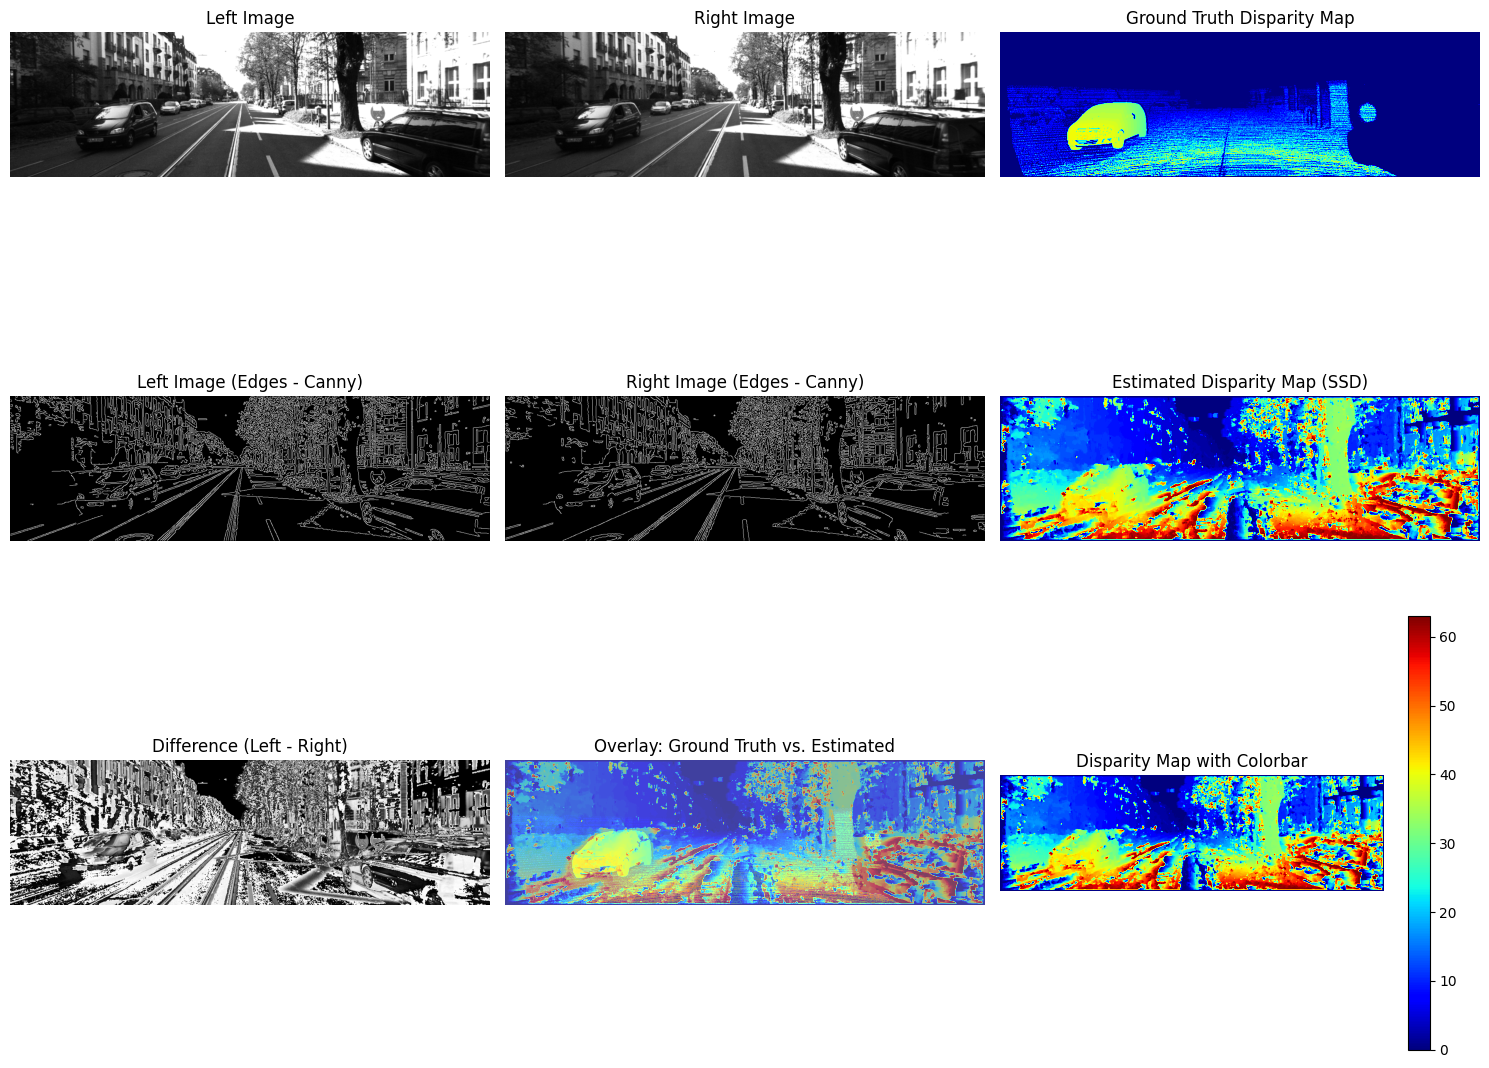

In [ ]:
# Main function with extended visualization
def main():
    # Load images from the dataset
    left_image_path = os.path.join(training_image_2, '000000_10.png')  # Update with the correct image file
    right_image_path = os.path.join(training_image_3, '000000_10.png')  # Update with the correct image file
    ground_truth_path = '/content/drive/MyDrive/data_stereo/training/disp_noc_0/000000_10.png'  # Ground truth disparity image

    left_image = load_image(left_image_path)
    right_image = load_image(right_image_path)
    ground_truth_disparity = load_image(ground_truth_path)

    # Check if images are loaded correctly
    if left_image is None or right_image is None or ground_truth_disparity is None:
        raise ValueError("One or more images could not be loaded. Please check the file paths.")

    # Apply image filtering techniques (e.g., Canny Edge Detection)
    left_edges = apply_canny(left_image)
    right_edges = apply_canny(right_image)

    # Disparity estimation using SSD
    disparity_map_ssd = disparity_estimation_with_epipolar(left_image, right_image, method='ssd')

    # Compute metrics (RMSE and MAE)
    rmse_ssd, mae_ssd = compute_metrics(disparity_map_ssd, ground_truth_disparity)
    print(f"SSD - RMSE: {rmse_ssd}, MAE: {mae_ssd}")

    # Extended Visualization
    extended_visualize_results(left_image, right_image, left_edges, right_edges, disparity_map_ssd, ground_truth_disparity)

if __name__ == "__main__":
    main()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to convert disparity to depth
def disparity_to_depth(disparity_map, baseline=0.54, focal_length=721.0):
    """
    Converting disparity map to depth map using the formula:
    depth = (focal_length * baseline) / disparity
    baseline: distance between the two camera centers (in meters)
    focal_length: focal length of the stereo camera (in pixels)
    """
    # Avoid division by zero
    disparity_map[disparity_map == 0] = 0.1
    depth_map = (focal_length * baseline) / disparity_map
    return depth_map

# Visualization function with 8 images including depth map
def extended_visualize_results(left_image, right_image, left_edges, right_edges, disparity_map, ground_truth):
    fig, axs = plt.subplots(3, 3, figsize=(15, 16))

    # Left Image
    axs[0, 0].imshow(left_image, cmap='gray')
    axs[0, 0].set_title('Left Image')
    axs[0, 0].axis('off')

    # Right Image
    axs[0, 1].imshow(right_image, cmap='gray')
    axs[0, 1].set_title('Right Image')
    axs[0, 1].axis('off')

    # Ground Truth Disparity
    axs[0, 2].imshow(ground_truth, cmap='jet')
    axs[0, 2].set_title('Ground Truth Disparity Map')
    axs[0, 2].axis('off')

    # Left Edges (Canny Edge Detection)
    axs[1, 0].imshow(left_edges, cmap='gray')
    axs[1, 0].set_title('Left Image (Edges - Canny)')
    axs[1, 0].axis('off')

    # Right Edges (Canny Edge Detection)
    axs[1, 1].imshow(right_edges, cmap='gray')
    axs[1, 1].set_title('Right Image (Edges - Canny)')
    axs[1, 1].axis('off')

    # Estimated Disparity Map
    axs[1, 2].imshow(disparity_map, cmap='jet')
    axs[1, 2].set_title('Estimated Disparity Map (SSD)')
    axs[1, 2].axis('off')

    # Difference between Left and Right Images
    diff_img = np.abs(left_image - right_image)
    axs[2, 0].imshow(diff_img, cmap='gray')
    axs[2, 0].set_title('Difference (Left - Right)')
    axs[2, 0].axis('off')

    # Overlay of Ground Truth and Estimated Disparity Map
    axs[2, 1].imshow(ground_truth, cmap='jet', alpha=0.5)
    axs[2, 1].imshow(disparity_map, cmap='jet', alpha=0.5)
    axs[2, 1].set_title('Overlay: Ground Truth vs. Estimated')
    axs[2, 1].axis('off')

    # Depth Map from Disparity
    depth_map = disparity_to_depth(disparity_map)
    im2 = axs[2, 2].imshow(depth_map, cmap='plasma')
    axs[2, 2].set_title('Depth Map (from Disparity)')
    axs[2, 2].axis('off')
    fig.colorbar(im2, ax=axs[2, 2])

    plt.tight_layout()
    plt.show()


SSD - RMSE: 8.959576901290271, MAE: 35.33059366612989


<ipython-input-8-16014fe6b35e>:15: RuntimeWarning: divide by zero encountered in divide
  depth_map = (focal_length * baseline) / disparity_map


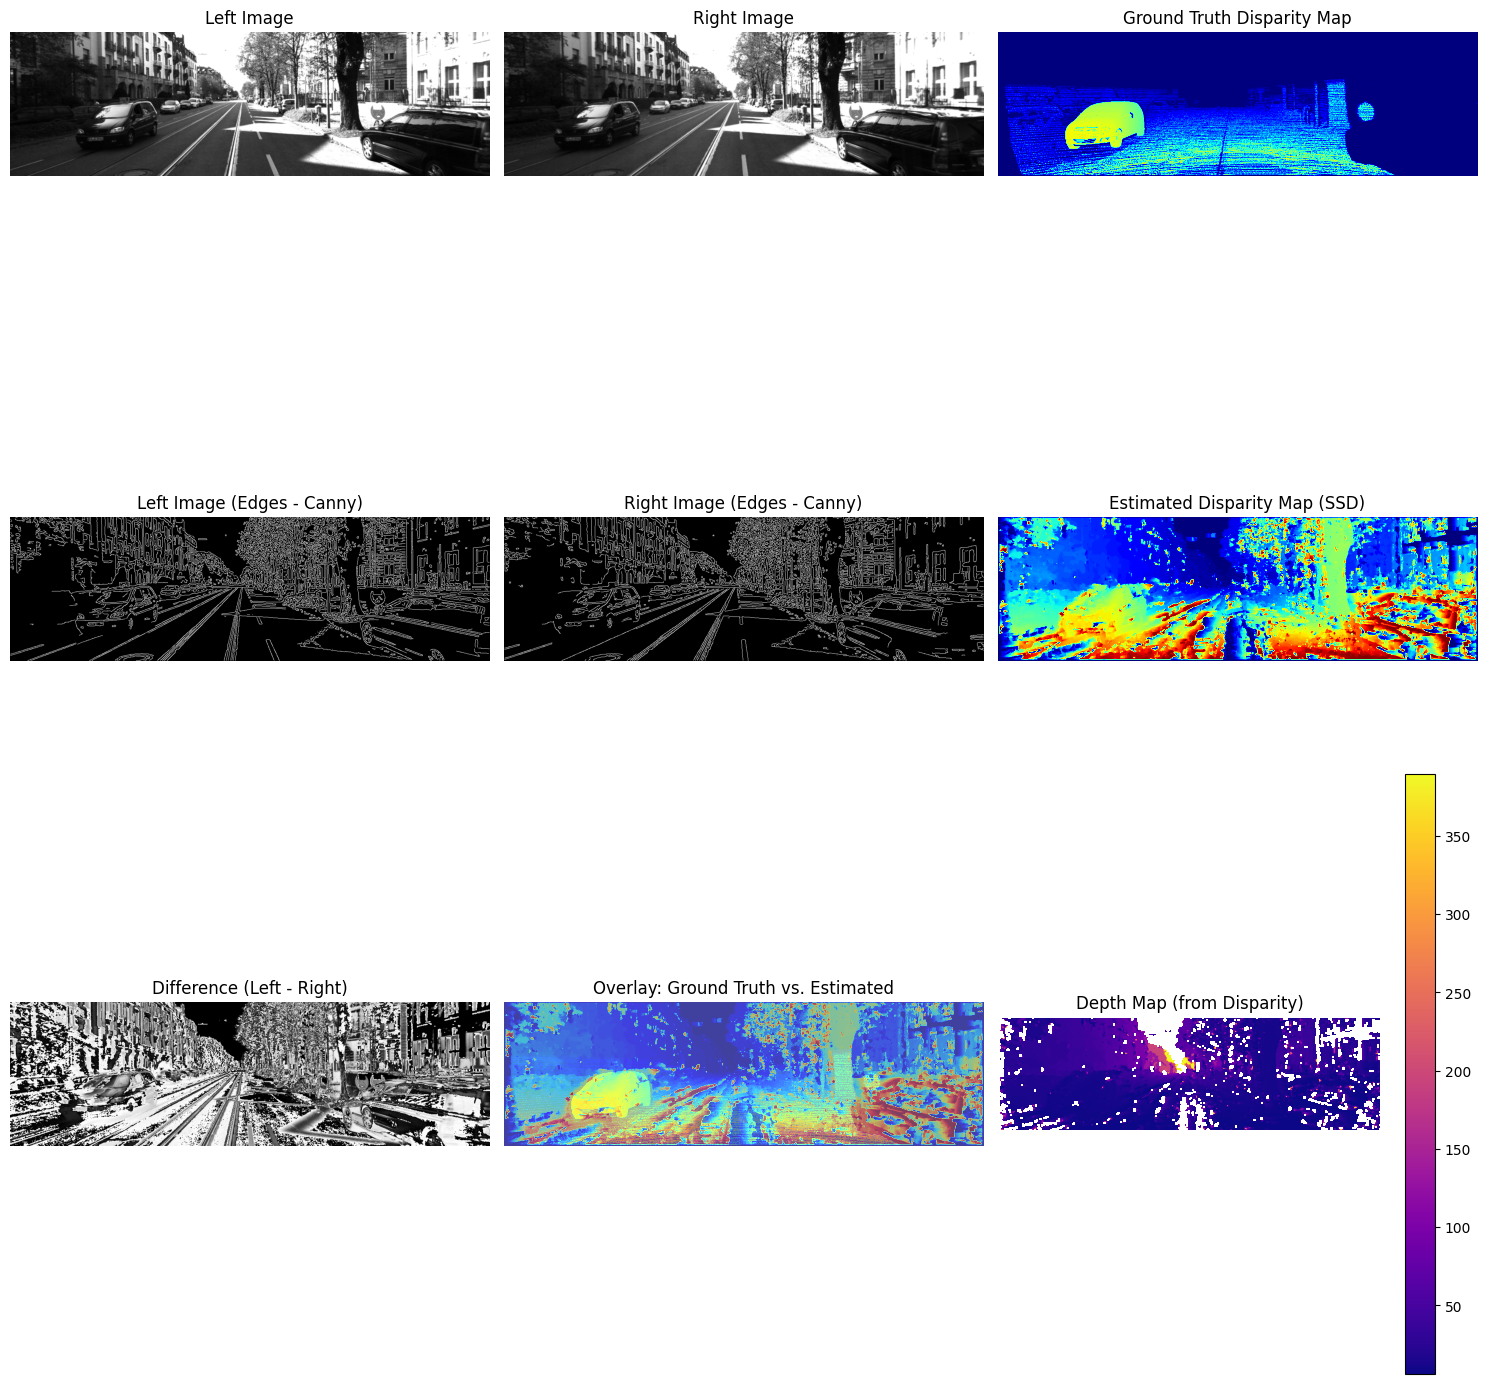

In [ ]:
# Main function with extended visualization including depth map
def main():
    # Load images from the dataset
    left_image_path = os.path.join(training_image_2, '000000_10.png')  # Update with the correct image file
    right_image_path = os.path.join(training_image_3, '000000_10.png')  # Update with the correct image file
    ground_truth_path = '/content/drive/MyDrive/data_stereo/training/disp_noc_0/000000_10.png'  # Ground truth disparity image

    left_image = load_image(left_image_path)
    right_image = load_image(right_image_path)
    ground_truth_disparity = load_image(ground_truth_path)

    # Check if images are loaded correctly
    if left_image is None or right_image is None or ground_truth_disparity is None:
        raise ValueError("One or more images could not be loaded. Please check the file paths.")

    # Apply image filtering techniques (e.g., Canny Edge Detection)
    left_edges = apply_canny(left_image)
    right_edges = apply_canny(right_image)

    # Disparity estimation using SSD
    disparity_map_ssd = disparity_estimation_with_epipolar(left_image, right_image, method='ssd')

    # Compute metrics (RMSE and MAE)
    rmse_ssd, mae_ssd = compute_metrics(disparity_map_ssd, ground_truth_disparity)
    print(f"SSD - RMSE: {rmse_ssd}, MAE: {mae_ssd}")

    # Extended Visualization with Depth Map
    extended_visualize_results(left_image, right_image, left_edges, right_edges, disparity_map_ssd, ground_truth_disparity)

if __name__ == "__main__":
    main()


# image filtering techniques such as ***Canny edge detection*** and ***Harris corner detection***

In [ ]:
# Function to load images from folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
# Load testing and training data
testing_images_2 = load_images_from_folder(testing_image_2)
testing_images_3 = load_images_from_folder(testing_image_3)
training_images_2 = load_images_from_folder(training_image_2)
training_images_3 = load_images_from_folder(training_image_3)

In [ ]:
# Convert images to grayscale
def convert_to_grayscale(images):
    gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]
    return gray_images

testing_gray_2 = convert_to_grayscale(testing_images_2)
testing_gray_3 = convert_to_grayscale(testing_images_3)
training_gray_2 = convert_to_grayscale(training_images_2)
training_gray_3 = convert_to_grayscale(training_images_3)

In [ ]:
# Edge detection using Canny
def apply_canny_edge_detection(images, low_threshold=50, high_threshold=150):
    edges = [cv2.Canny(img, low_threshold, high_threshold) for img in images]
    return edges



In [ ]:
# Corner detection using Harris
def apply_harris_corner_detection(images, block_size=2, ksize=3, k=0.04):
    corner_images = []
    for img in images:
        corners = cv2.cornerHarris(np.float32(img), block_size, ksize, k)
        # Dilating the corner spots for better visibility
        corners = cv2.dilate(corners, None)
        # Thresholding to mark the corners
        img_with_corners = np.copy(img)
        img_with_corners[corners > 0.01 * corners.max()] = 255
        corner_images.append(img_with_corners)
    return corner_images


In [ ]:
# Apply edge detection to grayscale images
testing_edges_2 = apply_canny_edge_detection(testing_gray_2)
testing_edges_3 = apply_canny_edge_detection(testing_gray_3)
training_edges_2 = apply_canny_edge_detection(training_gray_2)
training_edges_3 = apply_canny_edge_detection(training_gray_3)


In [ ]:
# Apply corner detection to grayscale images
testing_corners_2 = apply_harris_corner_detection(testing_gray_2)
testing_corners_3 = apply_harris_corner_detection(testing_gray_3)
training_corners_2 = apply_harris_corner_detection(training_gray_2)
training_corners_3 = apply_harris_corner_detection(training_gray_3)


In [ ]:
# Data visualization: Display edges and corners
def display_processed_images(original_images, processed_images, title, num_samples=3, cmap='gray'):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        # Display original image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(original_images[i], cmap=cmap)
        plt.title(f'{title} Original Image {i+1}')
        plt.axis('off')

        # Display processed image (edges or corners)
        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(processed_images[i], cmap=cmap)
        plt.title(f'{title} Processed Image {i+1}')
        plt.axis('off')
    plt.show()


## display Edges of test and train dataset

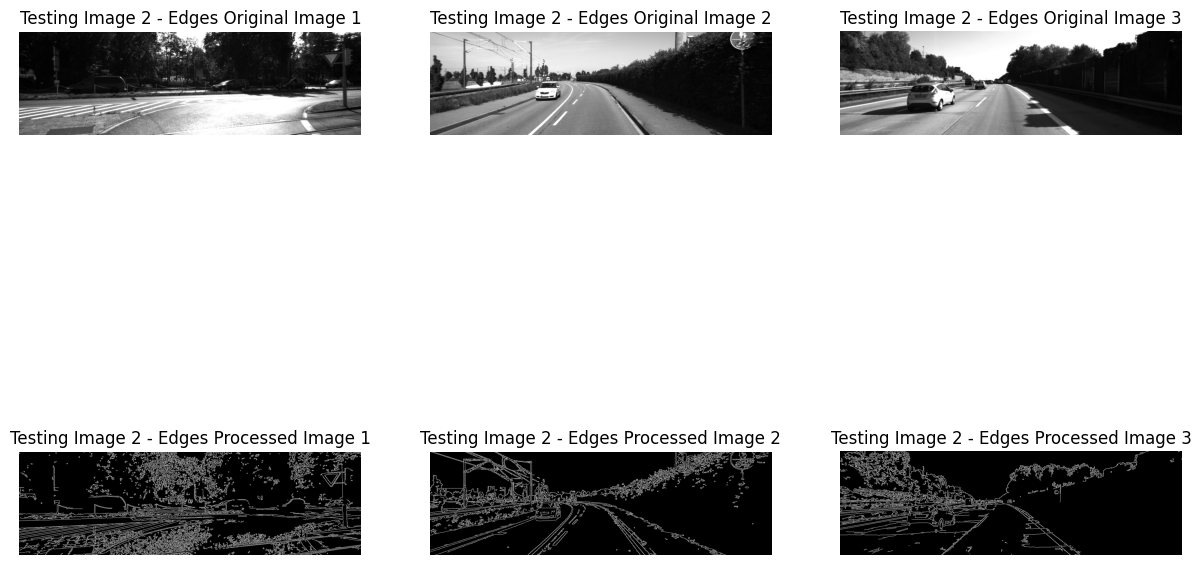

In [ ]:
# Display edges
display_processed_images(testing_gray_2, testing_edges_2, "Testing Image 2 - Edges")

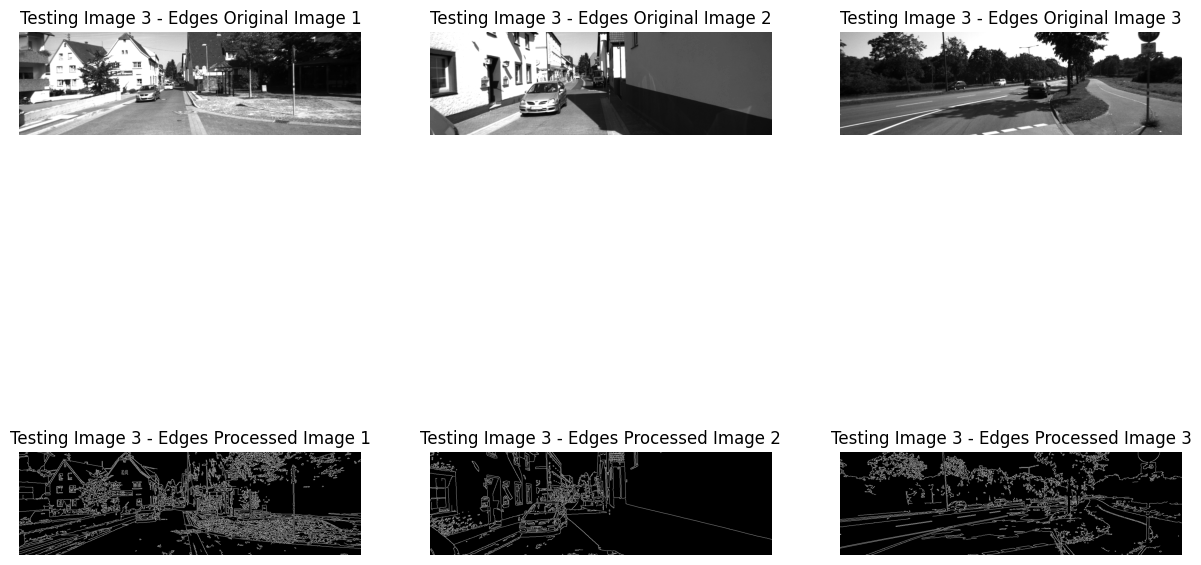

In [ ]:
display_processed_images(testing_gray_3, testing_edges_3, "Testing Image 3 - Edges")

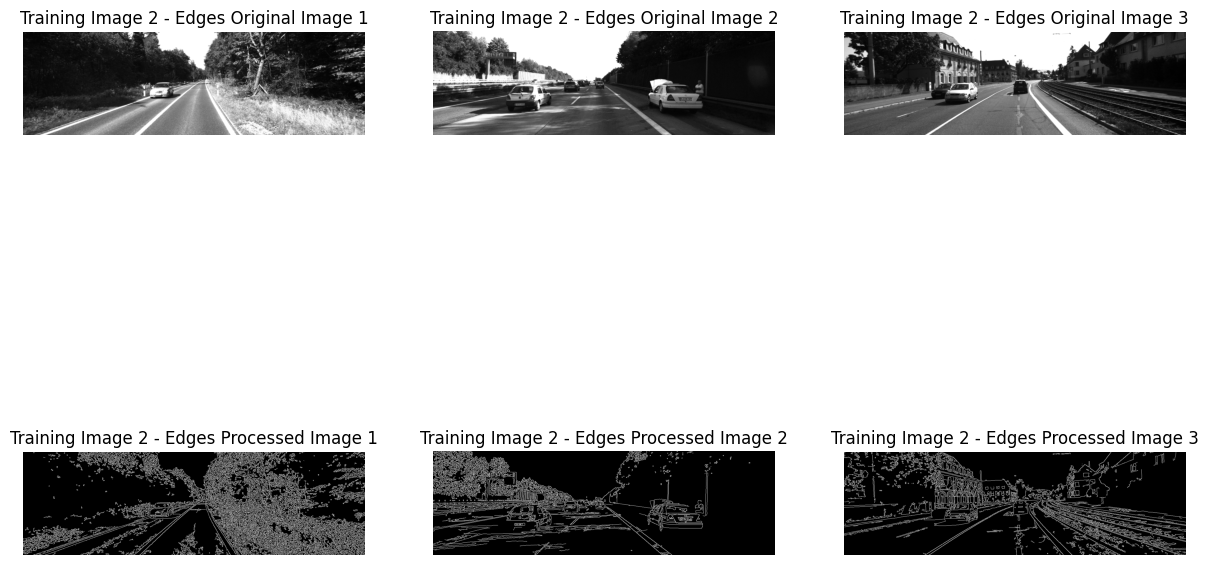

In [ ]:
display_processed_images(training_gray_2, training_edges_2, "Training Image 2 - Edges")

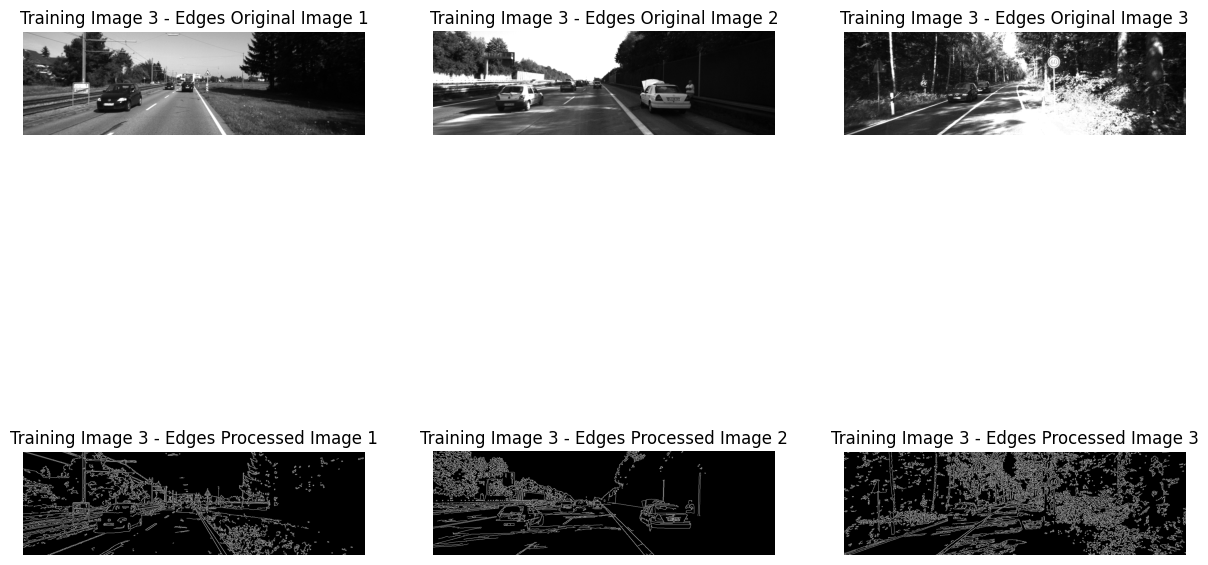

In [ ]:
display_processed_images(training_gray_3, training_edges_3, "Training Image 3 - Edges")

##  display Edges of test and train dataset

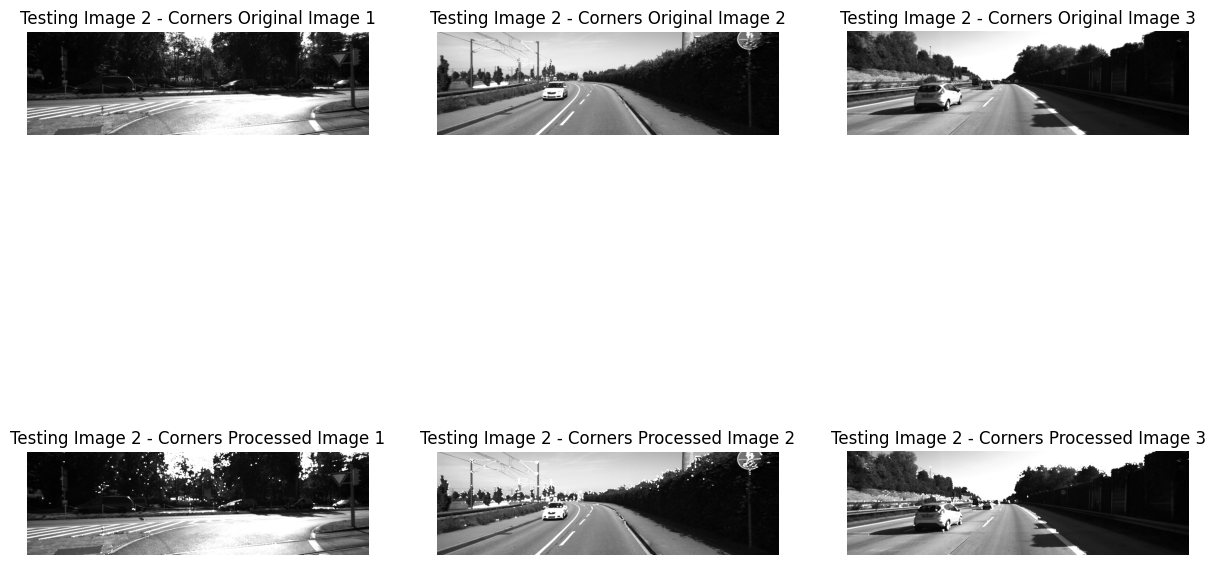

In [ ]:
# Display corners
display_processed_images(testing_gray_2, testing_corners_2, "Testing Image 2 - Corners")

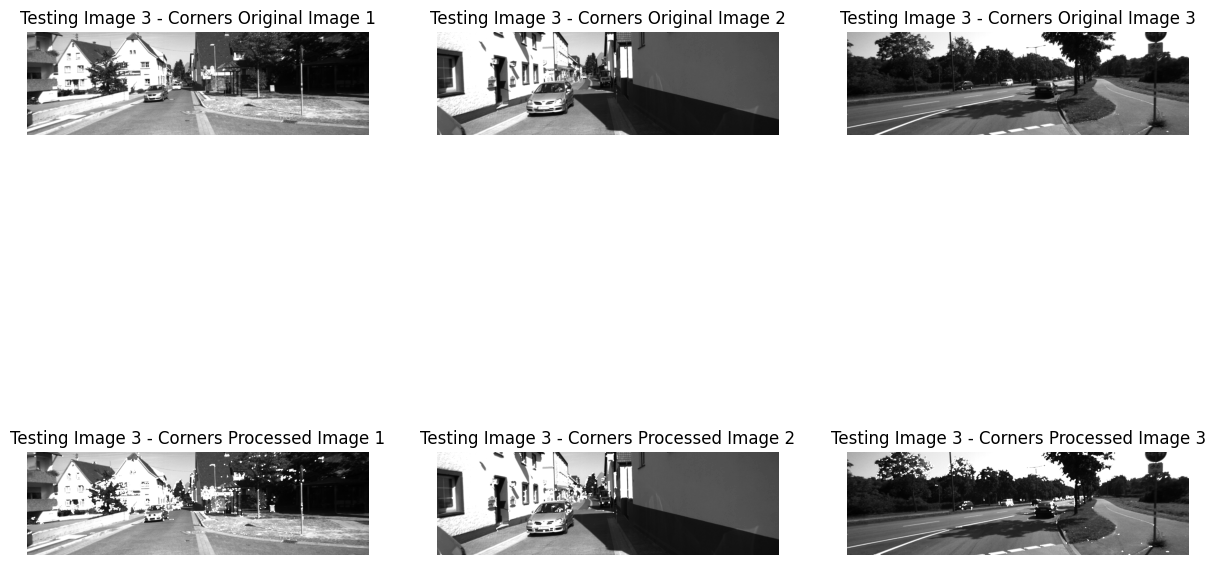

In [ ]:
display_processed_images(testing_gray_3, testing_corners_3, "Testing Image 3 - Corners")

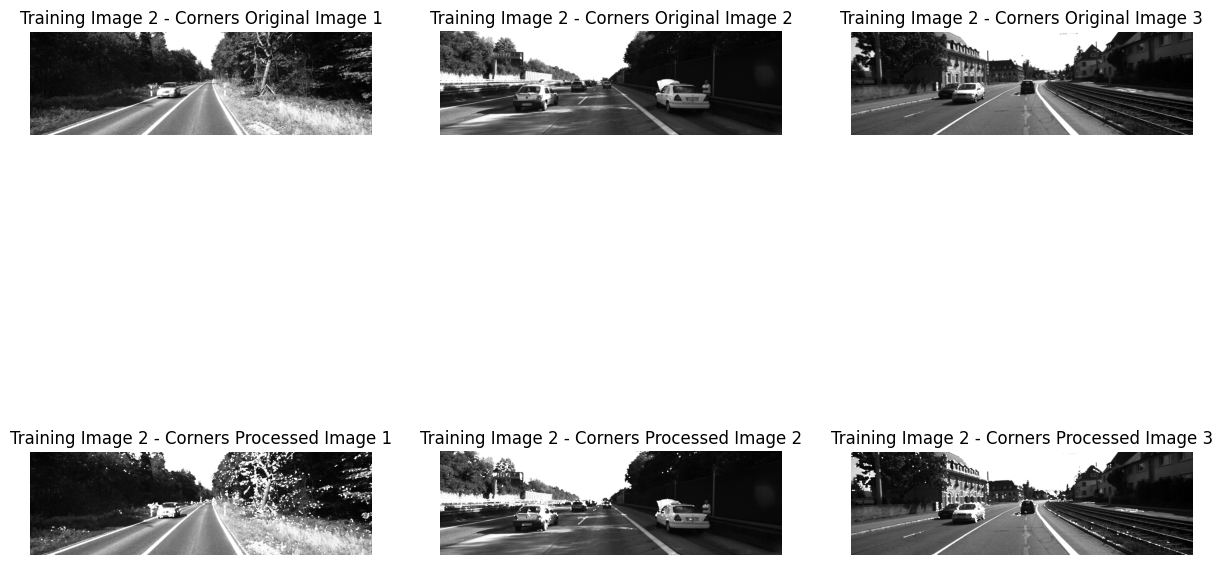

In [ ]:
display_processed_images(training_gray_2, training_corners_2, "Training Image 2 - Corners")

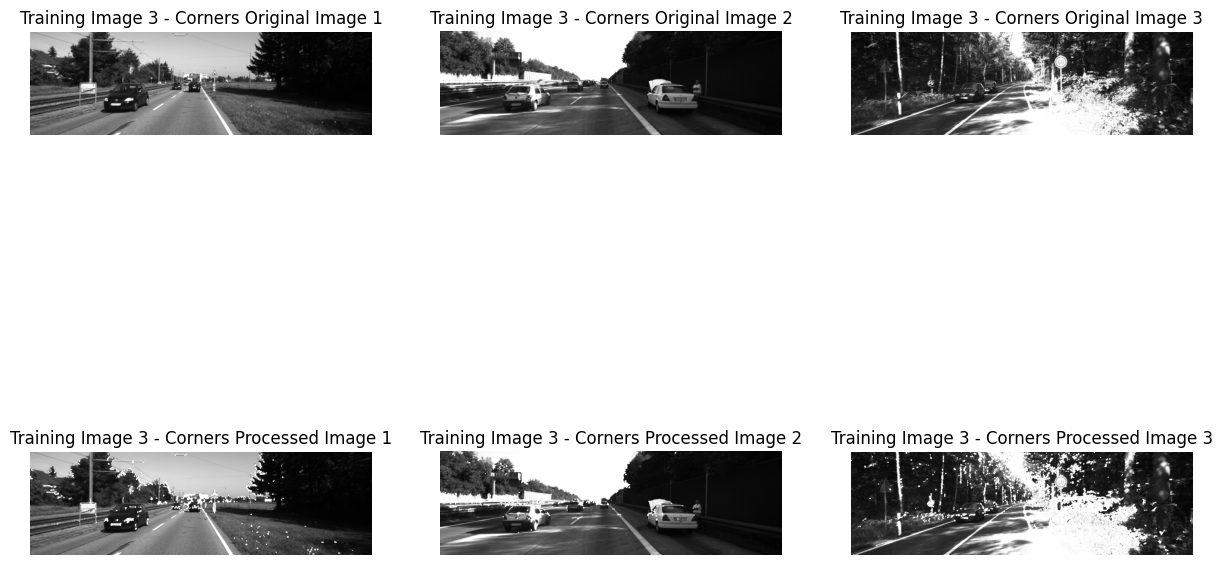

In [ ]:
display_processed_images(training_gray_3, training_corners_3, "Training Image 3 - Corners")

#Inference Time

#End-Point Error (EPE)

#Bad Pixel Rate

In [ ]:
import cv2
import os
import numpy as np
import time
import matplotlib.pyplot as plt


In [ ]:
# Load image utility function
def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Disparity estimation function (SSD method)
def disparity_estimation_with_epipolar(left_image, right_image, method='ssd', block_size=5, max_disparity=64):
    if method == 'ssd':
        stereo = cv2.StereoBM_create(numDisparities=max_disparity, blockSize=block_size)
        disparity_map = stereo.compute(left_image, right_image).astype(np.float32) / 16.0
        return disparity_map
    else:
        raise NotImplementedError(f"Method {method} not implemented.")

# Compute metrics (EPE and Bad Pixel Rate)
def compute_metrics(predicted_disparity, ground_truth_disparity, threshold=3):
    # Only consider valid pixels in the ground truth (pixels with disparity > 0)
    valid_mask = ground_truth_disparity > 0

    # End-Point Error (EPE)
    disparity_error = np.abs(predicted_disparity - ground_truth_disparity)
    epe = np.mean(disparity_error[valid_mask])

    # Bad Pixel Rate (Percentage of pixels where error exceeds threshold)
    bad_pixel_mask = (disparity_error > threshold) & valid_mask
    bad_pixel_rate = np.mean(bad_pixel_mask) * 100  # Convert to percentage

    return epe, bad_pixel_rate

Inference Time: 0.0390 sec
End-Point Error (EPE): 20.1181
Bad Pixel Rate: 11.91%


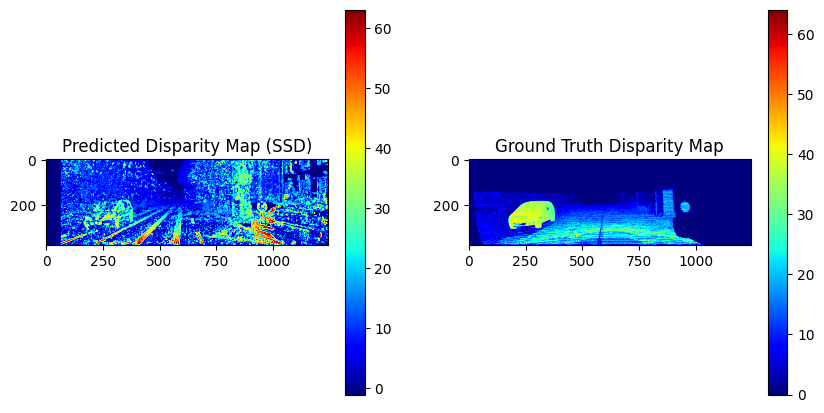

In [ ]:
# Main function
def main():
    # Paths to the stereo images and ground truth
    left_image_path = os.path.join(training_image_2, '000000_10.png')
    right_image_path = os.path.join(training_image_3, '000000_10.png')
    ground_truth_path = '/content/drive/MyDrive/data_stereo/training/disp_noc_0/000000_10.png'

    # Load images
    left_image = load_image(left_image_path)
    right_image = load_image(right_image_path)
    ground_truth_disparity = load_image(ground_truth_path)

    if left_image is None or right_image is None or ground_truth_disparity is None:
        raise ValueError("One or more images could not be loaded. Please check the file paths.")

    # Inference: Start the timer
    start_time = time.time()

    # Perform disparity estimation using SSD
    disparity_map_ssd = disparity_estimation_with_epipolar(left_image, right_image, method='ssd')

    # Inference: End the timer
    inference_time = time.time() - start_time

    # Resize ground truth to match predicted disparity map size if needed
    ground_truth_disparity = cv2.resize(ground_truth_disparity, (disparity_map_ssd.shape[1], disparity_map_ssd.shape[0]))

    # Compute metrics: EPE and Bad Pixel Rate
    epe, bad_pixel_rate = compute_metrics(disparity_map_ssd, ground_truth_disparity)

    # Print the results
    print(f"Inference Time: {inference_time:.4f} sec")
    print(f"End-Point Error (EPE): {epe:.4f}")
    print(f"Bad Pixel Rate: {bad_pixel_rate:.2f}%")

    # Visualize results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Predicted Disparity Map (SSD)')
    plt.imshow(disparity_map_ssd, cmap='jet')
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.title('Ground Truth Disparity Map')
    plt.imshow(ground_truth_disparity, cmap='jet')
    plt.colorbar()

    plt.show()

if __name__ == "__main__":
    main()


# Otsu's Method

In [ ]:
import cv2
import numpy as np
import os
import time
import matplotlib.pyplot as plt

# Load the image
def load_image(image_path):
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Otsu's Thresholding
def apply_otsu(disparity_map):
    _, otsu_thresholded = cv2.threshold(disparity_map, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu_thresholded

# Compute EPE and Bad Pixel Rate
def compute_metrics(predicted_disparity, ground_truth_disparity):
    ground_truth_resized = cv2.resize(ground_truth_disparity, (predicted_disparity.shape[1], predicted_disparity.shape[0]))
    epe = np.mean(np.abs(predicted_disparity - ground_truth_resized))
    bad_pixel_rate = np.mean(np.abs(predicted_disparity - ground_truth_resized) > 3) * 100
    return epe, bad_pixel_rate


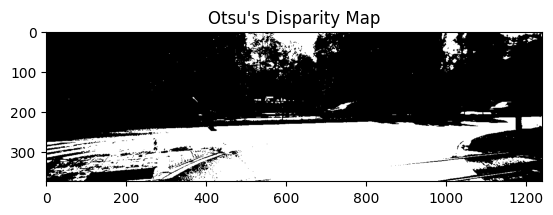

Inference Time: 0.02 seconds
EPE (Otsu): 95.86638539989265, Bad Pixel Rate (Otsu): 40.02941492216854%


In [ ]:
# Main function for Otsu's Method
def main_otsu():
    left_image_path = '/content/drive/MyDrive/data_stereo/testing/image_2/000000_10.png'
    ground_truth_path = '/content/drive/MyDrive/data_stereo/training/disp_noc_0/000000_10.png'

    left_image = load_image(left_image_path)
    ground_truth_disparity = load_image(ground_truth_path)

    start_time = time.time()

    otsu_disparity = apply_otsu(left_image)
    epe_otsu, bad_pixel_rate_otsu = compute_metrics(otsu_disparity, ground_truth_disparity)

    end_time = time.time()
    inference_time = end_time - start_time

    plt.imshow(otsu_disparity, cmap='gray')
    plt.title("Otsu's Disparity Map")
    plt.show()

    print(f"Inference Time: {inference_time:.2f} seconds")
    print(f"EPE (Otsu): {epe_otsu}, Bad Pixel Rate (Otsu): {bad_pixel_rate_otsu}%")

if __name__ == "__main__":
    main_otsu()


# K-means Clustering

In [ ]:
from sklearn.cluster import KMeans

# Apply K-means clustering to the disparity map
def apply_kmeans(disparity_map, k=2):
    h, w = disparity_map.shape
    disparity_flatten = disparity_map.reshape((-1, 1))
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(disparity_flatten)
    kmeans_segmented = labels.reshape((h, w))
    return kmeans_segmented


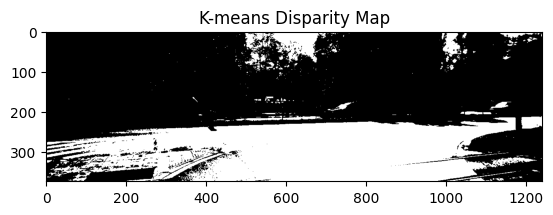

Inference Time: 0.16 seconds
EPE (K-means): 6.394196457326892, Bad Pixel Rate (K-means): 18.832420826623725%


In [ ]:
# Main function for K-means
def main_kmeans():
    left_image_path = '/content/drive/MyDrive/data_stereo/testing/image_2/000000_10.png'
    ground_truth_path = '/content/drive/MyDrive/data_stereo/training/disp_noc_0/000000_10.png'

    left_image = load_image(left_image_path)
    ground_truth_disparity = load_image(ground_truth_path)

    start_time = time.time()

    kmeans_disparity = apply_kmeans(left_image)
    epe_kmeans, bad_pixel_rate_kmeans = compute_metrics(kmeans_disparity, ground_truth_disparity)

    end_time = time.time()
    inference_time = end_time - start_time

    plt.imshow(kmeans_disparity, cmap='gray')
    plt.title("K-means Disparity Map")
    plt.show()

    print(f"Inference Time: {inference_time:.2f} seconds")
    print(f"EPE (K-means): {epe_kmeans}, Bad Pixel Rate (K-means): {bad_pixel_rate_kmeans}%")

if __name__ == "__main__":
    main_kmeans()


# Gaussian Smoothing

In [ ]:
# Apply Gaussian Smoothing to refine the disparity map
def apply_gaussian_smoothing(disparity_map, kernel_size=5):
    return cv2.GaussianBlur(disparity_map, (kernel_size, kernel_size), 0)


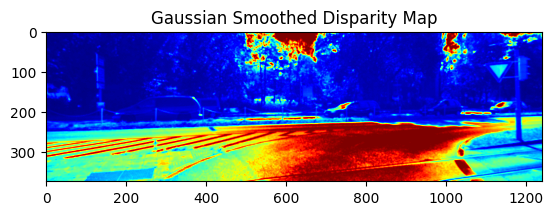

Inference Time: 0.05 seconds
EPE (Gaussian): 85.64377670424047, Bad Pixel Rate (Gaussian): 99.10101986044015%


In [ ]:
# Main function for Gaussian Smoothing
def main_gaussian():
    left_image_path = '/content/drive/MyDrive/data_stereo/testing/image_2/000000_10.png'
    ground_truth_path = '/content/drive/MyDrive/data_stereo/training/disp_noc_0/000010_10.png'

    left_image = load_image(left_image_path)
    ground_truth_disparity = load_image(ground_truth_path)

    start_time = time.time()

    gaussian_disparity = apply_gaussian_smoothing(left_image)
    epe_gaussian, bad_pixel_rate_gaussian = compute_metrics(gaussian_disparity, ground_truth_disparity)

    end_time = time.time()
    inference_time = end_time - start_time

    plt.imshow(gaussian_disparity, cmap='jet')
    plt.title("Gaussian Smoothed Disparity Map")
    plt.show()

    print(f"Inference Time: {inference_time:.2f} seconds")
    print(f"EPE (Gaussian): {epe_gaussian}, Bad Pixel Rate (Gaussian): {bad_pixel_rate_gaussian}%")

if __name__ == "__main__":
    main_gaussian()
